# Install and Import Modules 

In [93]:
#pip install neuralprophet

/Users/lucaslara/Desktop/MIF/PORTFOLIO - Pair Trading/.venv/bin/python: No module named pip.__main__; 'pip' is a package and cannot be directly executed
Note: you may need to restart the kernel to use updated packages.


In [94]:
from neuralprophet import NeuralProphet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Read and Preprocess the Data

In [95]:
def get_dates():
    # Get the current date
    today = datetime.now().date()
    
    # Adjust the current date if it's a weekend (Saturday or Sunday)
    if today.weekday() == 5:  # Saturday
        today -= timedelta(days=1)
    elif today.weekday() == 6:  # Sunday
        today -= timedelta(days=2)

    # Calculate the start date, which is January 1st, 6 years ago
    current_year = today.year
    start_date = datetime(current_year - 5, 1, 1).date()

    return start_date, today

start_date, end_date = get_dates()

In [96]:
#stock_symbol = 'USDCLP=X'
stock_symbol = 'TQQQ'

stock_data = yf.download(stock_symbol, start = start_date, end=end_date)

print(stock_data.head())
stock_data.to_csv('stock_data.csv')

[*********************100%%**********************]  1 of 1 completed

               Open     High     Low    Close  Adj Close     Volume
Date                                                               
2019-01-02   8.6950   9.5575  8.6825   9.3925   9.113276  135832800
2019-01-03   8.9950   9.1025  8.4075   8.4825   8.230330  165255200
2019-01-04   8.8875   9.6900  8.7925   9.5675   9.283074  136482000
2019-01-07   9.6175  10.0375  9.5325   9.8725   9.579007  106553200
2019-01-08  10.1725  10.2775  9.7250  10.1575   9.855535  105811200


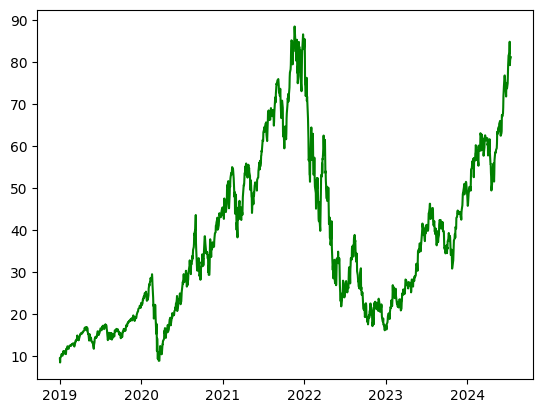

In [97]:
stocks = pd.read_csv('stock_data.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks = stocks[['Date', 'Close']]
stocks.columns = ['ds', 'y']

plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.show()

# Train the Model

In [98]:
model = NeuralProphet()
model.fit(stocks)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Users/lucaslara/Desktop/MIF/PORTFOLIO - Pair Trading/.venv/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.193% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100
WARNING - (py.warni

Epoch 100: 100%|██████████| 100/100 [00:00<00:00, 1904.46it/s, loss=0.00674, v_num=11, MAE=3.550, RMSE=4.570, Loss=0.00639, RegLoss=0.000]  


,MAE,RMSE,Loss,RegLoss,epoch
0,57.845016,71.791206,0.569233,0.0,0
1,43.345444,53.560959,0.391567,0.0,1
2,32.550785,39.957031,0.257574,0.0,2
3,25.488487,30.834894,0.175248,0.0,3
4,21.913548,26.161957,0.139121,0.0,4
...,...,...,...,...,...
95,3.525815,4.527473,0.006351,0.0,95
96,3.536349,4.545005,0.006378,0.0,96
97,3.550014,4.583473,0.006412,0.0,97
98,3.549590,4.557840,0.006382,0.0,98


# Evaluate the Model

WARNING - (py.warnings._showwarnmsg) - /Users/lucaslara/Desktop/MIF/PORTFOLIO - Pair Trading/.venv/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.193% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/lucaslara/Desktop/MIF/PORTFOLIO - Pair Trading/.venv/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /Users/lucaslara/Desktop/MIF/PORTFOLIO - Pair Trading/.venv/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (N

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 667.56it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /Users/lucaslara/Desktop/MIF/PORTFOLIO - Pair Trading/.venv/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.193% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/lucaslara/Desktop/MIF/PORTFOLIO - Pair Trading/.venv/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /Users/lucaslara/Desktop/MIF/PORTFOLIO - Pair Trading/.venv/lib/python3.12/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in 


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 913.19it/s] 

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


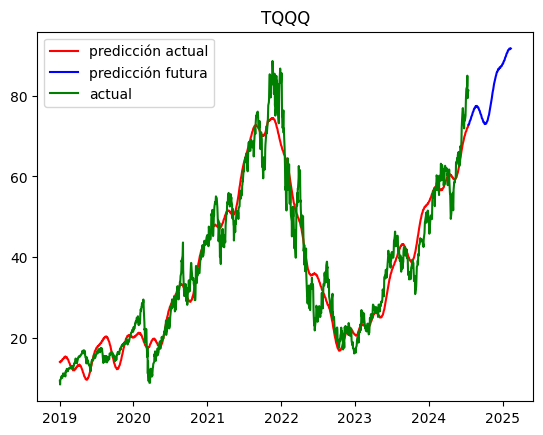

In [99]:
future = model.make_future_dataframe(stocks, periods = 150)

forecast = model.predict(future)
actual_prediction = model.predict(stocks)

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = "predicción actual", c = 'r')
plt.plot(forecast['ds'], forecast['yhat1'], label = 'predicción futura', c = 'b')
plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.legend()
plt.title(stock_symbol)
plt.show()

In [100]:
model.plot_components(forecast)

ERROR - (NP.plotly.plot_components) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - /Users/lucaslara/Desktop/MIF/PORTFOLIO - Pair Trading/.venv/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:283: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - /Users/lucaslara/Desktop/MIF/PORTFOLIO - Pair Trading/.venv/lib/python3.12/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


